In [1]:
conda install graphviz


Note: you may need to restart the kernel to use updated packages.


'conda' is not recognized as an internal or external command,
operable program or batch file.


In [30]:
pip install Pillow IPython --upgrade

   ---------------------------------------- 0.0/600.5 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/600.5 kB ? eta -:--:--
   ---------------------------------------- 600.5/600.5 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: IPython
    Found existing installation: ipython 8.30.0
    Uninstalling ipython-8.30.0:
      Successfully uninstalled ipython-8.30.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 6.0.3 requires ipython!=8.17.1,<9.0.0,>=8.13.0; python_version > "3.8", but you have ipython 9.0.2 which is incompatible.
spyder-kernels 3.0.2 requires ipython!=8.17.1,<9,>=8.13.0; python_version > "3.8", but you have ipython 9.0.2 which is incompatible.


In [31]:
conda update pillow ipython

Channels:
Note: you may need to restart the kernel to use updated packages.

 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [32]:
# Import thư viện cần thiết
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Trực quan hóa cây quyết định
from sklearn.tree import export_graphviz
import graphviz
# Xem hình ảnh
from PIL import Image
from IPython.display import display

In [17]:
# Tải dataset hoa Iris
iris = load_iris()
X, y = iris.data, iris.target

In [18]:
# Chia dữ liệu thành tập huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Khởi tạo mô hình cây quyết định
dt_model = DecisionTreeClassifier(
    criterion='entropy', # Tiêu chí đo lường: entropy hoặc gini
    max_depth=3, # Độ sâu tối đa của cây
    min_samples_split=5, # Số mẫu tối thiểu để phân chia nút
    random_state=42
)

In [20]:
# Huấn luyện mô hình
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5,
                       random_state=42)

In [21]:
# Dự đoán trên tập kiểm thử
y_pred = dt_model.predict(X_test)

In [22]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác: {accuracy:.4f}")

Độ chính xác: 0.9778


In [23]:
# Xuất cây dưới dạng DOT
dot_data = export_graphviz(
    dt_model,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

In [24]:
# Hiển thị cây
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", format="png")

'iris_decision_tree.png'

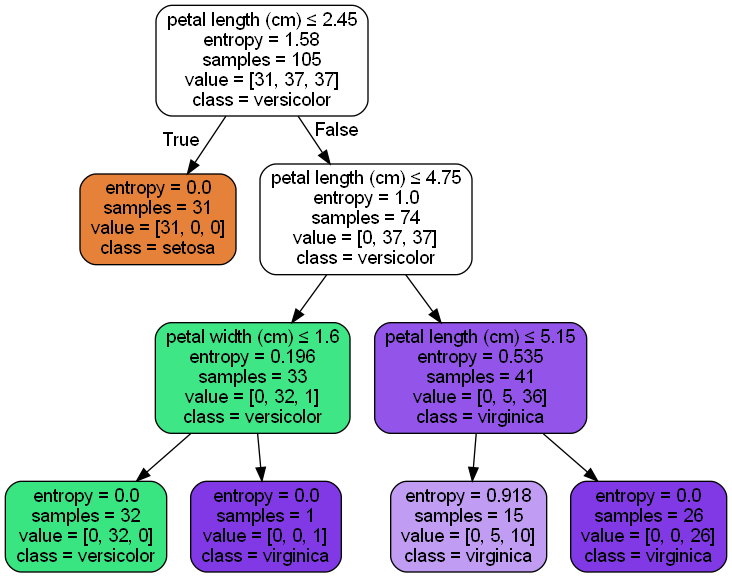

In [34]:
display(Image.open('iris_decision_tree.png'))